# **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Transfer Learning**

**Transfer Learning is Leveraging A Working Model Existing Architecture and Learned pattern For Our Own Problem**

# **Why Transfer Learning**

**Can Leverage Existing Neural Network Architecture Similar to own data**

**Can Leverage Working Network Architecture Which Already Learned Pattern on Similar Data**

# **Applications**

**1-Computer Vision**

**2- NLP (Natural language Processing)**

In [2]:
# Download And Become With Data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip The File

zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2022-02-18 10:26:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.81.208, 172.253.122.128, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.81.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  54.8MB/s    in 2.9s    

2022-02-18 10:26:17 (54.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# How Many Images In Each Folder

import os 

for dirpath, dirname , filename in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(dirname)} Directories and {len(filename)} Images in '{dirpath}'")

There are 2 Directories and 0 Images in '10_food_classes_10_percent'
There are 10 Directories and 0 Images in '10_food_classes_10_percent/test'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/ramen'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/fried_rice'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/hamburger'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/ice_cream'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/chicken_wings'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/steak'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/pizza'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/grilled_salmon'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/sushi'
There are 0 Directories and 250 Images in '10_food_classes_10_percent/test/chicken_curry

In [4]:
# Create Data Loader (Prepare The Data)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32 # CAPITAL WORDS REPRESENTS THAT THESE ARE HYPER PARAMETERS

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
print('Training Images')

Training Images


In [7]:
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = IMAGE_SHAPE,
                                                          batch_size= BATCH_SIZE,
                                                          class_mode='categorical')

test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size= IMAGE_SHAPE,
                                                        batch_size= BATCH_SIZE,
                                                        class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Introducing CallBacks**

**CallBacks Are Extra Functionality you can add to your model during or after training**

**Important CallBacks**

**1- Tracking Experiments With Tensorboard Callbacks**

**2- Model CheckPoint With Checkpoint Callbacks**

**3- Stopping Model From Train(Early Stopping)**

**Tool Which Can Add Helpful Functionality to your model During Training**



In [8]:
# Create Tensorboard Callback

import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y&m&d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving Tensorboard log Files To {log_dir}")
  return tensorboard_callback

# **Exploring Tensorflow Hub**

**Tensorflow Hub is Bit Repository Of Tensorflow Trained Model**

**In The Past, We Used Tensorflow To Create Our own Model From Very Scratch. Now we Can Acceess Pretrained Model**

**Image Net is Image DataBase. This is Huge Database Platform**

# **Paper With Code.com**

**RESNET_V2_50/feature_vetor**

**EfficientNetB0/feature_vector**

**Spend 10 Minutes To Explore Tensorflow Hub**

**The Higher The Number , The Complex Your Model**


# **Building and Compiling Tensorflow Hub**


In [9]:
# Lets Compare The Following Two Model

efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'


# Import Dependencies

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers 

In [10]:
# Lets Make as Create Model

def create_model(model_url, num_classes=10):

  '''
  Takes a Tensorflow Hub and Create Keras Sequential
  
  Args:
  Model_url(str): Tensorflow Hub Feature Extraction
  Num_classes(int) : Number of Output Neurons 

  Returns :
  An Uncompiled Keras Sequential Model With Model Url As Feature Extraction
  '''


  # Download Pretrained Model

  feature_extractor_layer = hub.KerasLayer(model_url, trainable=False,
                                           input_shape=IMAGE_SHAPE+(3,)) # Freeze Already  Learned Patterns

  # Create Our Own Model 

  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation ='softmax', name = 'output_layer')

  ])

  return model

# **Creating and Testing ResNet Tensorflow Hub**

In [11]:
# Create Resnet Model

resnet_model = create_model(resnet_url,num_classes = train_data_10_percent.num_classes)

# Compile The Model

resnet_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)



# **Bring Our Previous Model Out Of Water**

In [12]:
# Lets Fit Our Resnet Model To Data

resnet_history = resnet_model.fit(train_data_10_percent, 
                                  epochs=5,
                                  steps_per_epoch= len(train_data_10_percent),
                                  validation_data= test_data_10_percent,
                                  validation_steps = len(test_data_10_percent),
                                  callbacks = [create_tensorboard_callback(
                                      dir_name= 'tensorflow_hub',
                                      experiment_name = 'Resnet50V2'
                                  )])

Saving Tensorboard log Files To tensorflow_hub/Resnet50V2/2022&m&d-102628
Epoch 1/5
24/24 [==============================] - 386s 16s/step - loss: 1.9346 - accuracy: 0.3547 - val_loss: 1.1887 - val_accuracy: 0.6396
Epoch 2/5
24/24 [==============================] - 382s 16s/step - loss: 0.8996 - accuracy: 0.7253 - val_loss: 0.8457 - val_accuracy: 0.7256
Epoch 3/5
24/24 [==============================] - 379s 16s/step - loss: 0.6186 - accuracy: 0.8307 - val_loss: 0.7493 - val_accuracy: 0.7516
Epoch 4/5
24/24 [==============================] - 379s 16s/step - loss: 0.4700 - accuracy: 0.8813 - val_loss: 0.7032 - val_accuracy: 0.7696
Epoch 5/5
24/24 [==============================] - 410s 18s/step - loss: 0.3802 - accuracy: 0.9080 - val_loss: 0.6780 - val_accuracy: 0.7880


**Changes Some Shapes As Number Of Classes. WoW! Thats is Incredible. Our Transfer Learning Feature Extraction Model is out Performed all of the Previous Model**

# **Plot Loss Curves**

**Tidbit: You Could Put A function Like This Into Script called Helper.py and Import it into Colab** 

In [13]:
# Create Function To Plot Loss Curves

import matplotlib.pyplot as plt

def plot_loss_curves(history):

  '''
  Return Seperate Loss Curves Of Training and Validation Metrics .

  Args:
  History : Tensorflow History Object

  Return :

  Plot Of Training / Validation Loss and Accuracy Metrics
  '''

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy  = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot Loss

  plt.plot(epochs,loss,label='Training loss')
  plt.plot(epochs,val_loss, label='Val_loss')
  plt.title('loss')
  plt.xlabel('Epochs')
  plt.legend()


  # Plot Accuracy

  plt.plot(epochs,accuracy, label='training_accuracy')
  plt.plot(epochs,val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();





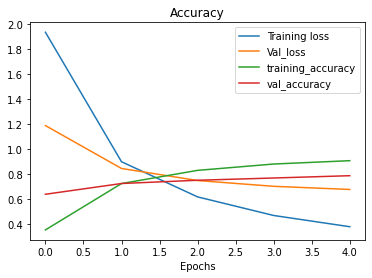

In [14]:
plot_loss_curves(resnet_history)

# **Creating and Testing Efficient Net B0 Tensorflow Hub Feature Extraction Model**

In [15]:
# Create Efficient Net B0 Feature Extractor

efficientnet_model = create_model(model_url = efficientnet_url,
                                  num_classes= train_data_10_percent.num_classes)

#  Compare Efficient Net Model

efficientnet_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


# Fit The Efficient Net Model To 10% Of Training Data

efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                                              epochs=5,
                                              steps_per_epoch = len(train_data_10_percent),
                                              validation_data = test_data_10_percent,
                                              validation_steps = len(test_data_10_percent),
                                              callbacks = [create_tensorboard_callback(
                                                  dir_name = 'Tensorflow Hub',
                                                  experiment_name = 'efficientNetb0'
                                              )])

Saving Tensorboard log Files To Tensorflow Hub/efficientNetb0/2022&m&d-110134
Epoch 1/5
24/24 [==============================] - 184s 8s/step - loss: 1.9232 - accuracy: 0.3800 - val_loss: 1.3291 - val_accuracy: 0.7208
Epoch 2/5
24/24 [==============================] - 174s 7s/step - loss: 1.0973 - accuracy: 0.7773 - val_loss: 0.8821 - val_accuracy: 0.8168
Epoch 3/5
24/24 [==============================] - 137s 6s/step - loss: 0.7743 - accuracy: 0.8347 - val_loss: 0.7054 - val_accuracy: 0.8440
Epoch 4/5
24/24 [==============================] - 136s 6s/step - loss: 0.6227 - accuracy: 0.8640 - val_loss: 0.6147 - val_accuracy: 0.8576
Epoch 5/5
24/24 [==============================] - 174s 7s/step - loss: 0.5247 - accuracy: 0.8920 - val_loss: 0.5623 - val_accuracy: 0.8604


**Plot Loss Curves**

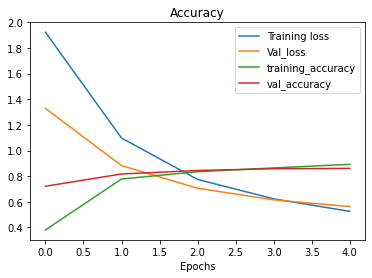

In [16]:
plot_loss_curves(efficientnet_history)

# **Types Of Transfer Learning**

**As-is Transfer Learning :- Using Existing Model with no Changes So Ever**

**Feature_Extraction Transfer Learning: Use The Pretrained Patterns Of Existing Model**

**Fine_Tuning Transfer Learning: Use The Prelearned Pattern Of Existing model and `Fine-Tune`Many or all The Underlying Layer (Including The Input layer)**


**Tidbit: Fine Tuning Required More Data Than Feature Extraction**



# **Compare Model Result**

**Tensorboard : A way To Visuallizing Explore Your Machine Learning Models Performance And Internals**

**Provide Visualization**

**Tidbit : When You Upload Things To TensorBoard Dev, Your Experiment Is Public. If You are Running Private Experiment Then Don't Upload Them to tensorboard Dev**

In [17]:
# Upload TensorBoard Dev Records

! tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name 'EfficientNetB0 vs ResNet50V2'\
  --description "Compairing Two Different Tf Hub Feature Extraction Model Architecture Using 10% of Model Data"\
  --one_shot


2022-02-18 11:15:40.659754: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/xOocZTZGTJ26yQckH7qSEQ/

[2022-02-18T11:15:40] Started scanning logdir.
[2022-02-18T11:15:41] Total uploaded: 30 scalars, 0 tensors, 1 binary objects (1.6 MB)
[2022-02-18T11:15:41] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/xOocZTZGTJ26yQckH7qSEQ/


 **After Yes! Enter Your Secret Code (You will get This Code From Google Colab). and Your Data Will Be Public**

In [18]:
! tensorboard dev list

2022-02-18 11:15:46.079839: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/xOocZTZGTJ26yQckH7qSEQ/
	Name                 EfficientNetB0 vs ResNet50V2
	Description          Compairing Two Different Tf Hub Feature Extraction Model Architecture Using 10% of Model Data
	Id                   xOocZTZGTJ26yQckH7qSEQ
	Created              2022-02-18 11:15:40 (13 seconds ago)
	Updated              2022-02-18 11:15:41 (12 seconds ago)
	Runs                 2
	Tags                 5
	Scalars              30
	Tensor bytes         0
	Binary object bytes  1705304
https://tensorboard.dev/experiment/awAecgu5QOapJv9mjGw51Q/
	Name                 EfficientNetB0 vs ResNet50V2
	Description          Compairing Two Different Tf Hub Feature Extraction Model Architecture Using 10% of Model Data
	Id                   awAecgu5QOapJv9mjGw51Q
	Created              2022-02-18 10:20:47 (55 minut

# **So This Is End Of Transfer Learning By Feature Extarction**